<a href="https://colab.research.google.com/github/RaphBhz/DAT615/blob/main/Assignment1_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Reinforcement Learning

In this assignment, we are going to first solve a simple RL exercise by reasoning about a 4-states simple MDP (Markov Decision Process), and afterwards implement a tabular RL agent that acts and (hopefully!) learns how to act in two different environments.

## Part 1 (3 points)

Suppose you have an MDP with 4 states, numbered from 1 to 4. The possible transitions are: from state 1 to states 2 and 4, from 2 to 1 and 3, from 3 to 1 and 4. Each transition gets you a reward of -1, with 4 being the terminal state.

Referring to the course slides, please answer to the questions in the markdown cells below:

1) A: Visualize the MDP (maybe write it down with pen and paper) and come up with the optimal policy (the best actions for each state).

Answer: In this particular context, every state transition cost us a reduction of the reward by 1. In order to maximize the reward, we need to reach the terminal state in minimum transitions.
States 1 and 3 have direct access to state 4. It means that they can reach the terminal state with only one iteration. State 2 is connected to both 1 and 3, meaning that whatever transition is chosen, its shortest path to state 4 is by 2 transitions. Therefore, a simple optimal policy would be to go to state 4 whenever possible, or to any other one if not possible (state 2).

Let's name the possible actions of our system:
- 2 to 1: $a$
- 2 to 3: $b$
- 1 to 2: $c$
- 1 to 4: $d$
- 3 to 1: $e$
- 3 to 4: $f$

Then, here is a mapping of optimal action per state:

|state|1|2|3|4|
| -------- |||||
|optimal action|$d$|$a$ or $b$|$f$|X|

1) B: How would this change if from state 2, when taking action $a$ (moving from 2 to 1) we had a probability of 0.5 of remaining in state 2 and when taking action $b$ (moving from 2 to 3) we had a probability of 0.3 of remaining in state 2?

Answer: If we were to apply such a modification to the system, a part of our policy should be reviewed. Optimal actions from states 1 and 3 do not change (they can still reach terminal state in 1 transition). However, we need to adress a change in the optimal action from state 2.
For both actions $a$ and $b$, we now have a probabity in staying in state 2. In the case we stay in state 2, we would still be unable to reach terminal state and therefore would need to use at least another transition, reducing our reward again. Therefore, being action $a$ or $b$, we want to maximize our chances of not staying in state 2. Since, $a$ has a 50% percent chance of keeping us in state 2 and $b$ a 30% chance, if we were to study a large enough number of scenarios, the choice of state $b$ would result in more positive scores as it has a lower probability of reducing our reward. Therefore, with those modifications, action $b$ becomes more optimized over a.

Then, here is an updated mapping of optimal action per state:

|state|1|2|3|4|
| -------- |||||
|optimal action|$d$|$b$|$f$|X|

2) If now our policy $\pi$ takes us from state 1 to 2, from 2 to 3, and from 3 to 4, what is $V_{\pi}$?

Answer: In case of a policy $\pi$ defined as:

|state|1|2|3|4|
| -------- |||||
|next state|2|3|4|X|

We can use the Bellman equation to compute the $V_\pi$ values for every state.
Considering the Bellamn equation: $V_\pi = \Sigma_a \pi(s\|a) \Sigma_{s'}T^a_{ss'}[R^a_{ss'}+\gamma V^R(s')$, our values are:

$V_\pi(4)=0$ (terminal state)

Now let's look at $V_\pi(3)$ term by term:
1. ($\Sigma_a \pi(s\|a)...$):
The value is a sum of expressions over all the possible actions, weighted by the probability of taking them under our policy ($\pi(s\|a)$). With the given policy, it is very simple as all our different states only have 1 possible action. Therefore, we will only have one element of weight 1 in our global sum.
2. $...\Sigma_{s'}T^a_{ss'}...$:
Now, our single expression also contains a sum over all the possible states after taking the current action. The elements of the sum are weighted by their transition probability ($T^a_{ss'}$)  Once again, our only action takes us to a single possible state under policy $\pi$. Therefore, we will have one element of weight 1 in our global sum.
3. $...[R^a_{ss'}+\gamma V_\pi^R(s')]$:
This last part of the equation sums the reward of taking action $a$ and transitioning from $s$ to $s'$ ($R^a_{ss'}$) and the $V_\pi$ value of state $s'$ weighted by a discount factor. Considering all our transitions have a reward value of -1 and that our discount factor is 1, the value of $V\pi(3)$ is:

$V_\pi(3)=1 * (-1+V^R(4))=-1$

Propagating this logic to the other values, we get:

$V_\pi(2)=1 * (-1+V^R(3))=-2$  
$V_\pi(1)=1 * (-1+V^R(2))=-3$

In conclusion, here are the values of $V_\pi$:


|state $s$|1|2|3|4|
| -------- |||||
|$V_\pi (s)$|-3|-2|-1|0|


3) Perform one step of synchronous value iteration, considering that $V_1(s)=2, \forall s \in S-{4}$, $V_1(4)=0$ (terminal state), $\gamma = 0.99$, and for each state we have uniform probability over the action space.

Answer: By using the Bellman value update equation, we can perform an iteration with the given values. We start with:

|s|1|2|3|4|
|-----|||||
|$V_1(s)$|2|2|2|0|

We will perform the iteration on all states by following the Belllman update rule:
$V_{i+1}(s)=max_{a\in A}(\Sigma_{s' \in S}P(s' \| s, a)[R(s, a, s')+ \gamma V_i(s')])$

In our case, we have uniform probability over the action space and for every action, only one possible resulting state. This will make the iteration very simple:

$V_2(1)=max(1*[R(1, c, 2)+ 0.99*V_1(2)], 1*[R(1, d, 4)+ 0.99*V_1(4)])\\
V_2(1)=max(1*[-1+0.99*2], 1*[-1+0.99*0])\\
V_2(1)=max(0.98, -1)=0.98$

$V_2(2)=max(1*[R(2, a, 1)+ 0.99*V_1(1)], 1*[R(2, b, 3)+ 0.99*V_1(3)])\\
V_2(2)=max(1*[-1+0.99*2], 1*[-1+0.99*2])\\
V_2(2)=max(0.98, 0.98)=0.98$

$V_2(3)=max(1*[R(3, e, 1)+ 0.99*V_1(1)], 1*[R(3, f, 4)+ 0.99*V_1(4)])\\
V_2(3)=max(1*[-1+0.99*2], 1*[-1+0.99*0])\\
V_2(3)=max(0.98, -1)=0.98$

In conclusion, after one iteration, we have:

|s|1|2|3|4|
|-----|||||
|$V_2(s)$|0.98|0.98|0.98|0|


4) How do different values of gamma impact RL?

Answer: The discount factor $\gamma$ in Reinforcement Learning determines the balance of weights between immediate current rewards and future rewards. Its value is in between 0 and 1 and weighs $V$ in the Bellman equation inner sum.

By choosing a high value of $\gamma$, we will choose to keep a high portion of $V$'s value. This means that $V$ will have a stronger impact over the sum and thus, over the result value of the Bellman equation. Over multiple iterations, it means giving more weight to the future values of $V$ which are the values of long-term rewards.

By choosing a low value of $\gamma$, we will have only a small portion of $V$'s value. Then, its weigh will have a lesser impact on the Bellman equation's result, meaning the other term of the sum will determine the result. This other term is the value of the immediate reward of taking the chosen action in our context. In a nutshell, it means giving more weight to the immediate reward of taking this action compared to the value of $V$.

5) The agent starts in state 1 and selects the action to move to state 2. The reward for this transition is -1, and the Q-values are:  $Q(1,2) = -1.5$  and  $Q(1,4) = -0.5$. After arriving at state 2, the agent observes the Q-values:  $Q(2,1) = -2.0$  and  $Q(2,3) = -1.0$. Using a learning rate  $\alpha = 0.1$  and  $\gamma = 0.9$ , calculate the updated value of  $Q(1,2)$.

Answer: To update the value of $Q(1, 2)$, we can use the Widrow-Hoff update rule. In our case, our actions only have one possible resulting state, so we will write this resulting state instead of the action name.  

Rule: $Q^{t+1}(s, s')=Q^t(s, s') + \alpha * ([r_t + \gamma max_{s''}(Q^t(s', s'')] - Q^t(s, s'))$

Following this rule, we have:

$Q^2(1,2)=Q^1(1,2)+0.1*([-1+0.9*max(Q^t(2,1), Q^t(2,3))]-Q^1(1,2))\\
Q^2(1,2)=-1.5+0.1*([-1+0.9*(-2.0)]+1.5)\\
Q^2(1,2)=-1.63$

6) Describe the trade-off between exploration and exploitation in RL. How does epsilon-greedy attempt to tackle it? Under epsilon-greedy what is the probability of selecting the maximising action?

Answer: Exploration describe the fact of trying actions whose consequence are not yet fully familiar for the system. Exploitation is about sticking to the information we currently have and pick the best known option.

When we prioritize exploration, we make sure the long-term result is optimized as we will end up trying a much larger spectrum of possibilities, and then we will be able to come up with a better solution based on this experience. However, this strategy implies a long phase of experimentation that might be long.

On the other hand, exploitation maximizes the immediate reward by instantly picking best actions based on the limited initial knowledge. This way, we can come up with decent solution faster but we might end up missing out on potential unknown better solutions.

Both of these concepts are essential but it is very important to weigh them correctly because exploring too much might make us loose time by trying less efficient options and exploiting too much might trap us in a suboptimal strategy.

The epsilon-greedy approach allows the system to give a chance to both strategies based on a set probability. Its concept is to give the system a probability $\epsilon$ to choose a random action, ensuring the exploration of the unknown. Then, the system aso has a $1- \epsilon$ chance of choosing to exploit the best known action yet. This way, we give room to both exploration and exploitation, and we can manually set the weight of each concept by wisely choosing $\epsilon$.

With the epsilon-greedy strategy, the pobability of selecting the maximizing action is the sum of the probability of selecting it initially and the probability of selecting it randomly.

Probability of initially selecting it: $1-\epsilon$

Probability of selecting it randomly: $\epsilon * \frac{1}{|A|}$ (with A the set of possible actions)

Therefore, the total probability of selecting the maximizing action is: $P=1-\epsilon + \frac{\epsilon}{|A|}$.

## Part 2 (4 points)

Now on to some RL implementation! This first exercise is in a custom environment which we will revisit again in Assignment 3. In this environment, your agent is a sous-chef tasked to prepare different kinds of pancakes.
At first, we will keep it simple: the only ingredients your agent can play around with are pancake bread, bacon, and sauce, referred to with indices 0,1,2 respectively.

The environment is given a set of recipes at the start, which will be the different goals the agent will randomly receive and try to reconstruct. Each goal is communicated to the agent at the start of an episode as a symbol (an index), which the agent does not have prior knowledge about: imagine that the head chef and your agent do not speak the same language, and that the head chef has left some different sketches for each recipe. Your agent will learn their meaning by interacting with the environment, preparing different pancakes and getting rewarded positively for getting the recipes right and negatively for getting them wrong.

The observation your agent receives is the current pancake they have produced (e.g. [0, 1, 1] is a slice of pancake bread followed by two bacon strips), plus the symbol that represents one of the goals (e.g. 3 for goal 3, which the agent does not know anything about apriori).

The actions your agent has at their disposal is to either position a pancake (0) a bacon strip (1) or some sauce (2).

The episode terminates when the maximum size of the pancake is reached.

At the start, the agent is then given a reward of +1 if it gets it right, -1 if it gets it wrong. This will change later!



In [65]:
#Imports

import numpy as np
import random
import matplotlib.pyplot as plt

In [66]:
recipes = []
recipes.append([0,1,2,0,1,2])
recipes.append([0,1,1,0,1,1])
recipes.append([0,1,1,0,2])
recipes.append([0,2,0,2,0,2])
recipes.append([0,1,1,1,1,1])

At the start, we will keep these goals fixed. Later we will ask you to try with different ones.

In [67]:
"""This is the environment for the pancake problem.
The goal is to create a pancake with the same ingredients as the intended goal."""

class IngredientsActionSpace:
    def __init__(self, n):
        self.n = n  # Number of possible ingredients

    def sample(self): #sample an action
        return random.randint(0, self.n-1)

    def __len__(self):
        return self.n

class PancakeEnv:
    def __init__(self, goals, max_pancake_size=6, partial_reward=False):
        #initialise the environment
        self.goals = goals #list of goals
        self.max_pancake_size = max_pancake_size #maximum number of ingredients in a pancake (including the pancake itself)
        self.action_space = IngredientsActionSpace(3) #0 is the pancake, 1 is the bacon, 2 is the sauce
        self.observation_space() #create the observation space
        self.partial_reward = partial_reward #if we want to give a partial reward


    def reset(self, goal = None): #reset the environment, choose a random goal if none is given
        self.word_for_goal = random.randint(0, len(self.goals)-1) if goal is None else goal #choose a random goal (note that we pass an index, not the actual goal pancake!)
        self.intended_goal = self.goals[self.word_for_goal] #get the actual goal pancake (we won't give it to the agent, but use it for computing the reward)
        self.current_pancake = [0] #we always start with a pancake with no ingredients
        return self.word_for_goal, self.current_pancake

    def step(self, action): #act 1 step in the environment
        self.current_pancake.append(action) #add the ingredient to the pancake
        reward, done = self.compute_reward_and_done() #compute the reward and if the episode is done
        return self.current_pancake, reward, done

    def compute_reward_and_done(self):
        if self.current_pancake == self.intended_goal: #we have reached the goal
                return 1, True
        if len(self.current_pancake) == self.max_pancake_size: # we have reached the maximum number of steps
            #if we want to give a partial reward, we compute it here, otherwise we return 0 (failure)
            return 0 if not self.partial_reward else partial_reward(self.intended_goal, self.current_pancake), True
        return 0, False #we are not done yet


    def observation_space(self):
        # We have all the permutations of pancakes ingredients, from a length of 1 to max_pancake_size. list them all
        # e.g. for max_pancake_size=3, we have
        # [0] [0,0] [0,1] [0,2] [0,0,0] [0,0,1] [0,0,2], [0,1,0]...
        self.observation_space = []
        for i in range(1, self.max_pancake_size+1):
            self.observation_space += self.permutations(i)

    def permutations(self, n): #recursive function to get all the permutations of pancakes ingredients
        if n == 1:
            return [[0]]
        perms = []
        for perm in self.permutations(n-1):
            for i in range(3):
                perms.append(perm + [i])
        return perms

    def get_observation_index(self, current_pancake): #get the index of the current pancake in the observation space (used for indexing the Q-table)
        return self.observation_space.index(current_pancake)

def partial_reward(goal, current_pancake):
    # we give a partial reward based on the number of ingredients that at the right place
    reward = 0
    for i in range(len(goal)):
        if goal[i] == current_pancake[i]:
            reward += 1
    return reward/len(goal)


At first, we start without partial reward, so our agent will be rewarded ONLY if the agent is able to reconstruct the whole pancake. This makes this simple reward actually very hard to learn, as we will see shortly.

In [68]:
env = PancakeEnv(recipes, max_pancake_size=6, partial_reward=False)
env.reset()


(4, [0])

How large is the observation space? And the goal space? What about the action space?

# Environment
**Action space**: The action space is the set of all possible actions the system can do. In our case, its either choosing bread, bacon or sauce (0, 1 or 2).

**Goal space**: The goal space the set of all targeted results.

**Observation space**: The observation space is the spectrum of all possible states in the current system. If our action space size is $a$ and our maximum size is $n$, then the observation space is all the possible combinations of size from $1$ to $n$ of numbers between $0$ and $a-1$. Therefore, its size is the sum of the possible combinations of every possible length: $\text{Observation space size} = \Sigma^n_{i=1}a^i$.

In [69]:
print("Observation space size: ", len(env.observation_space))
print("Goal space size: ", len(env.goals))
print("Current goal size: ", len(env.intended_goal))
print("Action space size: ", len(env.action_space))
print("Sample observation: ", env.observation_space[random.randint(0, len(env.observation_space)-1)])

Observation space size:  364
Goal space size:  5
Current goal size:  6
Action space size:  3
Sample observation:  [0, 2, 1, 0, 2, 1]


Try to sample a starting goal and observation!

# Observation
At every action our system does, we extract an observation that will allow us to learn from what happened in order to modify our policy accordingly. After every step, we return three values: the current pancake value, the reward of the action that was just made and whether or not the pancake is complete.

In [70]:
print("Starting goal: ", env.intended_goal)
observation = env.step(env.action_space.sample())
print("--- Observation ---")
print("Current pancake: ", observation[0])
print("Reward: ", observation[1])
print("If the pancake done: ", observation[2])
print("---")
env.reset()

Starting goal:  [0, 1, 1, 1, 1, 1]
--- Observation ---
Current pancake:  [0, 0]
Reward:  0
If the pancake done:  False
---


(4, [0])

# Q-Learning

Q-Learning is a simple RL model-free algorithm which you have covered in the lecture.

We have included the algorithm below. Can you implement it? We have implemented some helper functions but you should fill in the rest.

<!-- ![text](algorithm.png) -->
[![Q-learning algorithm](https://miro.medium.com/v2/resize:fit:1400/1*7AWfjw8YDfoRqnIO71DjiA.png)](https://en.wikipedia.org/wiki/Q-learning)

Note that in this case, actions will have different consequences depending on the goal we are aiming to achieve. This means that we cannot have one single Q-table for each goal, or our updates will be conflicting. The first dimension of the Q-table should be the number of goals!

In reality, the goal symbol is actually part of the state space. We keep it separate from the observation space though as it will be easier to index both with what the environment returns us.

In [71]:
# Initializing a Q-table
# The table is constructed as a three-dimensional table:
# First dimension is the targeted goal, second is the state and third the different actions
def q_table():
  # The length of the env goals gives us the number of different targets, being the first dimension of the table
  # The length of the observation space gives us the number of all different possibilities of states in the environment, second dimension
  # The length of action space is the thrid dimension
  Qtable = np.zeros((len(env.goals), len(env.observation_space), len(env.action_space)))
  return Qtable

# Applying the greedy policy
# In this policy, we choose the action which Q-value is the highest for the given state and goal
def greedy_policy(Qtable, state_idx):
  action = np.argmax(Qtable[env.word_for_goal][state_idx])
  return int(action)

# Applying the epsilon-greedy policy
# In this policy, we receive an epsilon value that will determine the propbability of our system to choose a random action instead of applying the greedy strategy.
def epsilon_greedy_policy(Qtable, state_idx, epsilon):
  # Draw a random real between 0 and 1, if it is smaller than epsilon, apply the random policy, otherwise, choose the greedy policy
  return random_policy() if random.uniform(0, 1) <= epsilon else greedy_policy(Qtable, state_idx)

# Applying the random policy
def random_policy():
  # We select a random action out of the action space
  return env.action_space.sample()


Here we provide some parameters for you. Feel free to play around with them and see how good your agent gets!

# Choosing learning parameters


Currently, the system only gives rewards upon correct completion. This means that the only way to get a positive feedback is to get every action correct in one go. Therefore, in the current state, the rewards can be very rare at the beginning of the training.

This is why we chose to keep a high learning rate, giving more weight to every reward occurence. Also, for the same reasons, we want to give weight to future rewards also, and this is why we also took a high value of $\gamma$.

In [80]:
# Training parameters
n_training_episodes = 100000  # Total training episodes
max_steps = 5 # DO NOT CHANGE: Max steps per episode (ingredients you can place)
learning_rate = 1         # Learning rate

# Environment parameters
gamma = 0.9                # Discounting rate

Try to experiment with different $\epsilon$ , and see how much exploration is required to solve this problem.
A good idea is always to also try a decaying epsilon when fixed epsilons are not doing great, granting more exploration at the start ($\epsilon$ close to 1), and more exploitation towards the end ($\epsilon$ close to 0).


# Decaying $\epsilon$
The choice of a value for $\epsilon$ is crucial as it is going to balance our exploration and exploitation. Without proper exploration, we might end up with a suboptimal policy and without enough exploitation, we won't be able to consistently reach the targeted result.

Also, during the training of our system, we might want to use different values for $\epsilon$ depending on the level of experience we've gathered so far. For example, exploiting too early is no good since we're not yet sure of what is optimal and exploring too late might be useless as we will end up exploring suboptimal choices.

Therefore, we need to implement a way of varying the value of $\epsilon$ throughout the training. Since we want to explore more at the beginning and less at the end, we will decay its value over time. In order to try different strategies, let's implement three decay functions of $\epsilon$:

- a cubic decay
- a linear decay
- an exponential decay

Using these functions, we will be able to test the system with different balances of exploration and exploitation. While the exponential decay quickly gets rid of the exploration and starts exploiting very soon, the cubic function explore until late and then switches towards exploitation very quickly at the end. The linear function proposes a balanced strategy.

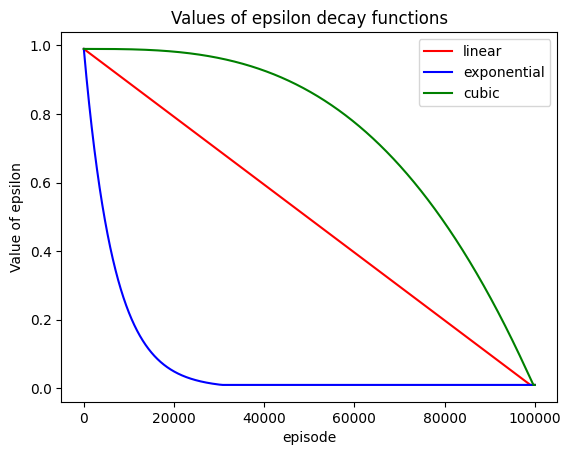

In [91]:
"Optional: implement a function to decay epsilon over time and plot it"
# Base epsilon value, to be decayed over time
epsilon_0 = 0.99

def build_epsilons():
  # Set of epsilon for complete random policy (only 1s)
  random_epsilon = np.zeros(n_training_episodes)
  # Set of epsilon values decaying with a linear function
  lin_epsilon = np.zeros(n_training_episodes)
  # Set of epsilon values decaying with an exponential function
  exp_epsilon = np.zeros(n_training_episodes)
  # Set of epsilon values decaying with a cubic function
  cub_epsilon = np.zeros(n_training_episodes)

  # We vary the values of epsilon throughout the total number of episodes
  # We use the ratio of the current episode by the total number to keep an adpatative formula for different values of n_training_episodes
  for episode in range(n_training_episodes):
    random_epsilon[episode] = 1
    lin_epsilon[episode] = max(0.01, epsilon_0 * (1 - episode/n_training_episodes))
    exp_epsilon[episode] = max(0.01, epsilon_0 * np.exp(-15 * episode/n_training_episodes))
    cub_epsilon[episode] = max(0.01, epsilon_0 * (1 - np.power(episode/n_training_episodes, 3)))

  return random_epsilon, lin_epsilon, exp_epsilon, cub_epsilon

random_epsilon, lin_epsilon, exp_epsilon, cub_epsilon = build_epsilons()

# Plotting the decay curves
plt.plot(lin_epsilon, label='linear', color='red')
plt.plot(exp_epsilon, label='exponential', color='blue')
plt.plot(cub_epsilon, label='cubic', color='green')
plt.title('Values of epsilon decay functions')
plt.xlabel('episode')
plt.ylabel('Value of epsilon')
plt.legend()

# Learning

It is quite difficult to try to predict the performance of our different parameters right away. Let's run our algorithm and interpret the result.

In [82]:
# Make the system learn
# This function will run a complete scenario of the system, for a set amount of episodes and a max number of steps
# It is going to apply an epsilon greedy policy with values following a given decaying function
# The system will update a Q-table based on the actions taken and will return a set of rewards over time once it is done
def qlearn(epsilons, Qtable, update = True, log = False):
  rewards = []

  # We iterate over all episodes
  for episode in range(len(epsilons)):
    # At every episode, we reset the environment to start on a fresh context
    goal, state = env.reset()
    done = False

    # We make sure we don't do more steps than needed
    for step_n in range(max_steps):

      # In order to use the correct value in the Q-table, we need to retrieve the index corresponding to the state value of our current pacake
      state_idx = env.get_observation_index(state)

      # The action to be done is going to be determined by our epsilon greedy policy defined above
      # The value of epsilon is determined by the inputed set of decayed values, we pick the value corresponding to the current iteration
      action = epsilon_greedy_policy(Qtable, state_idx, epsilons[episode])
      # We execute a step in the system and retrieve the observation
      new_state, reward, done = env.step(action)

      if update:
        # Like before, we need the index corresponding to the resulting state
        new_state_idx = env.get_observation_index(new_state)

        # Now, we apply the update of our Q-table following the concept mentionned above
        # We update the values for the currently targeted goal, the previous state and the taken action
        # We use the index of the resulting state to retreive the future optimal action of s'
        Qtable[env.word_for_goal][state_idx][action] += learning_rate * (reward + gamma * max(Qtable[env.word_for_goal][new_state_idx]) - Qtable[env.word_for_goal][state_idx][action])

      # We update the state for the next iteration
      state = new_state

      # If the observation marked the current pacake as finished, we register the reward of this episode and proceed to the next one
      if done:
        if log:
          print(f"Episode {episode}, reward {reward} ({step_n} steps)")
        rewards.append(reward)
        break

  # We return the values of the rewards per episode as a result
  return rewards, Qtable

In [83]:
# Now, we compute the evolution of rewards per episode for every decay function we created
r_lin_decay, r_lin_decay_qtable = qlearn(lin_epsilon, q_table())
r_exp_decay, r_exp_decay_qtable = qlearn(exp_epsilon, q_table())
r_cub_decay, r_cub_decay_qtable = qlearn(cub_epsilon, q_table())

---- Average reward on 1000 executions ----
with linear decay:  1.0
with exponential decay:  0.818
with cubic decay:  1.0
--------


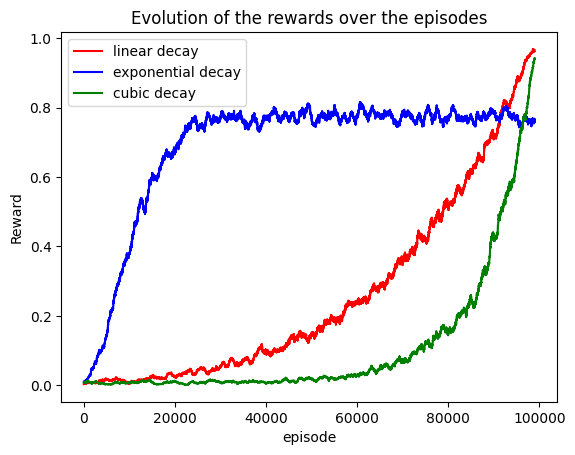

In [92]:
"Plot the rewards - depending on your exploration strategy, the curve might be hard to interpret,"
"try using a moving average to smooth it out"

def moving_average(x, window_size=None):
    if window_size is None:
        window_size = len(x)//10
    return np.convolve(x, np.ones(window_size), 'valid') / window_size

plt.plot(moving_average(r_lin_decay, 1000), label='linear decay', color='red')
plt.plot(moving_average(r_exp_decay, 1000), label='exponential decay', color='blue')
plt.plot(moving_average(r_cub_decay, 1000), label='cubic decay', color='green')
plt.title('Evolution of the rewards over the episodes')
plt.xlabel('episode')
plt.ylabel('Reward')
plt.legend()

# To evaluate the resulting policies, we run 1000 episodes on the resulting Q-tables
lin_perf, _ = qlearn(np.zeros(1000), r_lin_decay_qtable, False)
exp_perf, _ = qlearn(np.zeros(1000), r_exp_decay_qtable, False)
cub_perf, _ = qlearn(np.zeros(1000), r_cub_decay_qtable, False)

print('---- Average reward on 1000 executions ----')
print('with linear decay: ', sum(lin_perf)/1000)
print('with exponential decay: ', sum(exp_perf)/1000)
print('with cubic decay: ', sum(cub_perf)/1000)
print('--------')

First, let's inspect the performance of the resulting policies of our systems. The system with an exponential $\epsilon$ decay is the only one that did not manage to find an optimal policy. It was able to reach a satisfying performance very ealry on due to its quick shift to exploitation, but ended up being stuck with suboptimal decisions.

On the other hand, our two other systems were able to get a perfect score on all of our 1000 executions on their resulting Q-Tables.

With our current number of episodes, the linear $\epsilon$ decay would be a better choice. It is able to get better rewards throughout the iterations of episodes and balances exploration and exploitation quite well.

However, it is worth mentionning that if we were to work on a small enough amout of episodes, there will be a point where the linear decay would not be able to come up with an optimal policy anymore as it won't be able to explore anymore. This threshold would be lower with the cubic decay as it is able to keep exploring even in the late stages of the training.

Another interesting visualisation could be to observe the variations of $\epsilon$ close to the evolution of the rewards.

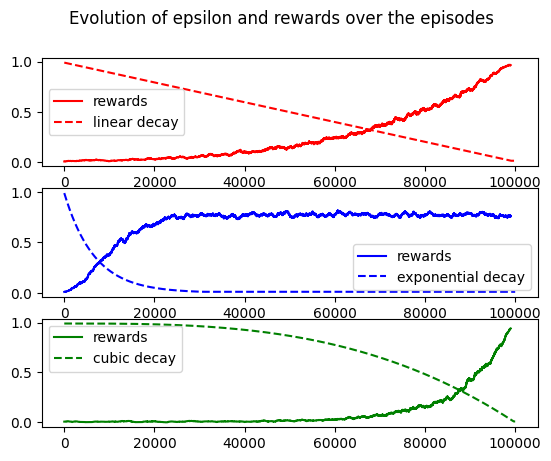

In [90]:
fig, (plt1, plt2, plt3) = plt.subplots(3, 1)

plt1.plot(moving_average(r_lin_decay, 1000), label='rewards', color='red')
plt2.plot(moving_average(r_exp_decay, 1000), label='rewards', color='blue')
plt3.plot(moving_average(r_cub_decay, 1000), label='rewards', color='green')

plt1.plot(lin_epsilon, '--', label='linear decay', color='red')
plt2.plot(exp_epsilon, '--', label='exponential decay', color='blue')
plt3.plot(cub_epsilon, '--', label='cubic decay', color='green')

fig.suptitle('Evolution of epsilon and rewards over the episodes')
plt1.legend()
plt2.legend()
plt3.legend()

We can see that for the exponential decay as well as for the cubic decay, the reward curves clearly follow the trends of their decay functions. The exponential decay system is suboptimal so we know it suffers a bottleneck from its lack of exploration. For the cubic system, we might have a lack of exploitation as the reward follows the decay very closely. It might mean that we are exploring too much and that any slight decrease in randomness direclty increases the rewards.

However, for the system with a linear decay, the reward curve first grows slightly slower than its decay function but catches back at the end. This might mean that this system balances exploration and exploitation well overall. The slower start shows an exploration phase that is enough to catch back on an optimal policy later on when $\epsilon$ fades.


# Partial rewarding

Do not worry if you don't manage to get an agent that has perfectly learnt the environment, try to obtain the best reward plot you can get.

We are going to try change the reward strategy of the environment, meaning that now our agent receives a partial reward at the end of each episode, i.e. the fraction of ingredients that match with the actual ingredient of the recipe.

Try again to train a new Q-learning agent and obtain the rewards plot. Compare the previous plot and this one qualitatively!

*(Optional)* For both environments (with and without partial reward) it can help to be aware of how a random agent would perform on the environment, just to have a very low baseline, to understand if our agent is learning anything. Feel free to use the random_policy() function and plot how the rewards look for it.

In [103]:
# First, we compute the rewards for a complete random policy without partial rewards
r_random, r_random_qtable = qlearn(random_epsilon, q_table())

# We set up the system to give partial rewards
env = PancakeEnv(recipes, max_pancake_size=6, partial_reward=True)

# Now that the system is updated we can re-compute the rewards value with partial rewards
r_random_with_partial, r_random_with_partial_qtable = qlearn(random_epsilon, q_table())
r_lin_with_partial, r_lin_with_partial_qtable = qlearn(lin_epsilon, q_table())
r_exp_with_partial, r_exp_with_partial_qtable = qlearn(exp_epsilon, q_table())
r_cub_with_partial, r_cub_with_partial_qtable = qlearn(cub_epsilon, q_table())

---- Average of last 1000 rewards ----
with a random policy:  1.0
with linear decay:  1.0
with exponential decay:  1.0
with cubic decay:  1.0
--------


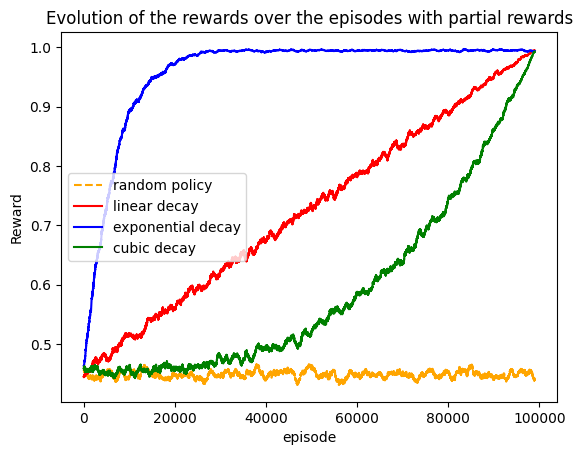

In [104]:
# We plot the results
plt.plot(moving_average(r_random_with_partial, 1000), '--', label='random policy', color='orange')
plt.plot(moving_average(r_lin_with_partial, 1000), label='linear decay', color='red')
plt.plot(moving_average(r_exp_with_partial, 1000), label='exponential decay', color='blue')
plt.plot(moving_average(r_cub_with_partial, 1000), label='cubic decay', color='green')
plt.title('Evolution of the rewards over the episodes with partial rewards')
plt.xlabel('episode')
plt.ylabel('Reward')
plt.legend()

perf_random_partial, _ = qlearn(np.zeros(1000), r_random_with_partial_qtable)
perf_lin_partial, _ = qlearn(np.zeros(1000), r_lin_with_partial_qtable)
perf_exp_partial, _ = qlearn(np.zeros(1000), r_exp_with_partial_qtable)
perf_cub_partial, _ = qlearn(np.zeros(1000), r_cub_with_partial_qtable)

# We compute the average of the last 1000 performances of each system to get an idea of their optimality after the training
print('---- Average of last 1000 rewards ----')
print('with a random policy: ', sum(perf_random_partial)/1000)
print('with linear decay: ', sum(perf_lin_partial)/1000)
print('with exponential decay: ', sum(perf_exp_partial)/1000)
print('with cubic decay: ', sum(perf_cub_partial)/1000)
print('--------')

The first thing we can notice is that, with partial rewards, all of our systems do not start from null values, reducing the need of randomness.

Also, we can see that our previously suboptimal exponential decay system now comes up with an optimal policy the fastest. Thanks to the partial rewards, systems comprehend the environment much faster and therefore need less exploration than before.

It is worth noticing that even if its randomness makes it perform very bad during learning, if we update the values correclty, a full random action selection can still make us obtain an optimal policy Q-Table in this simple system for this large amount of episodes.

Also, now that we know that even our exponential system explores enough, we can recompare the linear decay of $\epsilon$ with the rewards it induces.  

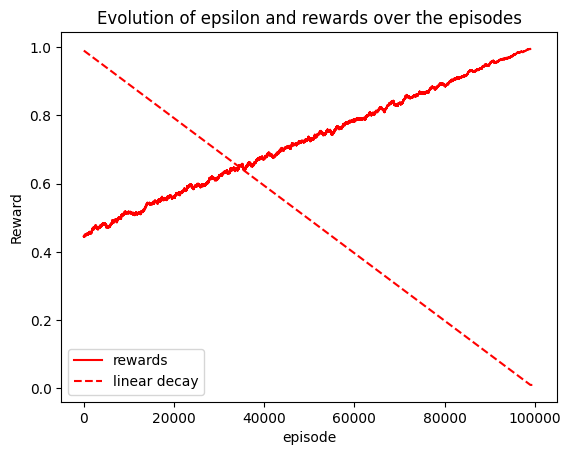

In [105]:
plt.plot(moving_average(r_lin_with_partial, 1000), label='rewards', color='red')

plt.plot(lin_epsilon, '--', label='linear decay', color='red')

plt.title('Evolution of epsilon and rewards over the episodes')
plt.xlabel('episode')
plt.ylabel('Reward')
plt.legend()

Now that we have partial rewards, the curve of rewards through the episodes follows its linear $\epsilon$ decay a lot closer. It shows that our system with linear decay now explores more than needed.


# Part 3: Blackjack! (3 points)

For those that are unfamiliar, blackjack is a common card game. There are (at least) two-agents, the dealer and the player. In our case, at the beginning of the game the dealer gives our agent one card. The dealer's card is placed face up. The dealer also gets two cards: one is face up, the other face down.
The player observes their own card and the dealer's card and must decide to 'hit' (i.e. get a new card) or to 'stick'(i.e. keep the hand that they've got).

If the player selects 'stick' it is then the dealers turn, which will turn the hidden card face-up, and then hit until their sum is at least or they bust (they go over 21). The goal is to beat the dealer, i.e. get a higher sum than them without busting ourselves.

This environment comes from the popular gymnasium library, which has a lot of different RL environments for you to try. You can read more info about this environment and the rules of blackjack it follows at https://gymnasium.farama.org/environments/toy_text/blackjack/.

Here are the main points:

**Action Space**

There are two actions: stick (0), and hit (1).

**Observation Space**

The observation consists of a 3-tuple containing: the player’s current sum, the value of the dealer’s one showing card (1-10 where 1 is ace), and whether the player holds a usable ace (0 or 1).

**Rewards**

win game: +1

lose game: -1

draw game: 0


[![Blackjack!](https://www.gymlibrary.dev/_images/blackjack.gif)]

In [ ]:
# !pip install gym #uncomment if you haven't installed gym yet
import gym

In [ ]:
env = gym.make("Blackjack-v1", sab=True)

action_size = env.action_space.n
state_size = env.observation_space
print(f"Number of states: {state_size}, Number of actions: {action_size}")

In [ ]:
# again, hyperparameters that you can change
learning_rate = 0.01
n_training_episodes = 100000 # you can try also 1000000, it might take a while
epsilon = 0.1

In [ ]:
state, _ = env.reset()
print(f"Initial state: {state}")

Note above how the observation looks. As we said before, the states are tuples of 3 values. Modify the functions defining the Q-table and your policies accordingly (if needed), keeping in mind we will need to store 2 q-values for each combination of these values, since we have two actions.

P.S. Note that you can reuse a lot of code from Part 2, and you are also encouraged to!

In [ ]:
import random

def q_table(): #initialise the Q-table
  Qtable = ...
  return Qtable

def greedy_policy(...): #choose the action with the highest Q-value
  action = ...
  return int(action)

def epsilon_greedy_policy(...): #choose a random action with probability epsilon, otherwise choose the greedy action
    ...

def random_policy():
    return env.action_space.sample()


In [ ]:
rewards = []
for episode in range(n_training_episodes):
    state, _ = env.reset()
    done = False
    cur_reward = 0
    while not done:
        action = ...
        new_state, reward, terminated, truncated, _ = env.step(action)
        cur_reward += ...
        Qtable[...] = ...
        state = new_state
        done = terminated or truncated
        if done:
            rewards.append(cur_reward)
            break

Let's plot the rewards and see if the agent is learning something. Again, it might be a good idea to plot a moving average of your rewards, as depending on your exploration tactic the reward might be very noisy.

What result do you get? Does it seem reasonable given our expectations knowing the blackjack game (the dealer always have the advantage)?

In [ ]:
# Plot the rewards
...

Let's try to see how good our agent is! Try to see what the average reward your agent gets in 100 episodes.
(What is the difference from the training loop above? Since we are now testing, do we want to update the Qtable? Also, what is the policy we want to use now?)

In [ ]:
# Test the agent, get the average reward
...

## Visualize the agent's policy

Note that this code works with the Q-table being represented as a dictionary with keys being the observations and values being numpy arrays of length 2 (one element for each action). If you have represented your Q-table as an n-dimensional array, you might have to modify the create_grids function (or change the Q-table representation to a dictionary).

In [ ]:
#!pip install seaborn #uncomment if you haven't installed seaborn yet

from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def create_grids(Qtable, usable_ace=False):
    """Create value and policy grid given an agent."""
    # convert our state-action values to state values
    # and build a policy dictionary that maps observations to actions
    state_value = defaultdict(float)
    policy = defaultdict(int)
    # If Qtable is an n-dimensional numpy array, we need to convert it to a dictionary
    if isinstance(Qtable, np.ndarray): #changes the Qtable to a dictionary if it is a numpy array
        Qtable = {k: v for k, v in np.ndenumerate(Qtable)}
    for obs, action_values in Qtable.items():
        state_value[obs] = float(np.max(action_values))
        policy[obs] = int(np.argmax(action_values))

    player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.arange(12, 22),
        np.arange(1, 11),
    )

    # create the value grid for plotting
    value = np.apply_along_axis(
        lambda obs: state_value[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    value_grid = player_count, dealer_count, value

    # create the policy grid for plotting
    policy_grid = np.apply_along_axis(
        lambda obs: policy[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    return value_grid, policy_grid


def create_plots(value_grid, policy_grid, title: str):
    #Creates a plot using a value and policy grid.
    # create a new figure with 2 subplots (left: state values, right: policy)
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)

    # plot the state values
    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot_surface(
        player_count,
        dealer_count,
        value,
        rstride=1,
        cstride=1,
        cmap="viridis",
        edgecolor="none",
    )
    plt.xticks(range(12, 22), range(12, 22))
    plt.yticks(range(1, 11), ["A"] + list(range(2, 11)))
    ax1.set_title(f"State values: {title}")
    ax1.set_xlabel("Player sum")
    ax1.set_ylabel("Dealer showing")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlabel("Value", fontsize=14, rotation=90)
    ax1.view_init(20, 220)

    # plot the policy
    fig.add_subplot(1, 2, 2)
    ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.set_xticklabels(range(12, 22))
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)

    # add a legend
    legend_elements = [
        Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
        Patch(facecolor="grey", edgecolor="black", label="Stick"),
    ]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    return fig


# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(Qtable, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

In [ ]:
# state values & policy without usable ace (ace counts as 1)
value_grid, policy_grid = create_grids(Qtable, usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()

Can you see some patterns in the value function and policy plots of your agents? What is the difference between when we have a usable ace or not at the start? Comment below: